In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans


In [2]:
# Reading csv file in to a dataframe
df = pd.read_csv("Stores.csv")
print(df.head())
print(df.isnull().sum()) 
# No null values, no need for data wrangling for null values

          Store  Sales Turnover  Store Size  Staff Size  Profit Margin
0      New York             5.1         3.5         1.4            0.2
1   Los Angeles             4.9         3.0         1.4            0.2
2       Chicago             4.7         3.2         1.3            0.2
3       Houston             4.6         3.1         1.5            0.2
4  Philadelphia             5.0         3.6         1.4            0.2
Store             0
Sales Turnover    0
Store Size        0
Staff Size        0
Profit Margin     0
dtype: int64


In [4]:
# extracting descriptive features
df_desc  = df.iloc[:,1:]
print(df_desc)

,Sales Turnover,Store Size,Staff Size,Profit Margin
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Normalization
norm = Normalizer()
df_ft = pd.DataFrame(norm.fit_transform(df_desc), columns=df_desc.columns)
df_ft

,Sales Turnover,Store Size,Staff Size,Profit Margin
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


Text(0.5, 1.0, 'inertia with respect to k')

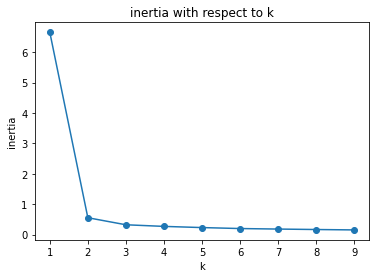

In [8]:
# Plotting inertia vs k
ks = range(1, 10)
inertias = []

for k in ks:
    model_kmeans = KMeans(n_clusters=k, random_state=2021)
    model_kmeans.fit(df_ft)
    inertias.append(model_kmeans.inertia_)

plt.plot(ks, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('inertia with respect to k')

In [15]:
# optimal k is 3 as per the elbow method above.
# Clustering with k=3

model_kMeans = KMeans(n_clusters=3)

model_kMeans.fit(df_ft)

print(model_kMeans.labels_)

# adding back to dataframe
df['Cluster'] = model_kMeans.labels_

print(df.head(5))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
          Store  Sales Turnover  Store Size  Staff Size  Profit Margin  \
0      New York             5.1         3.5         1.4            0.2   
1   Los Angeles             4.9         3.0         1.4            0.2   
2       Chicago             4.7         3.2         1.3            0.2   
3       Houston             4.6         3.1         1.5            0.2   
4  Philadelphia             5.0         3.6         1.4            0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


Text(0.5, 1.0, 'Cluster Histogram')

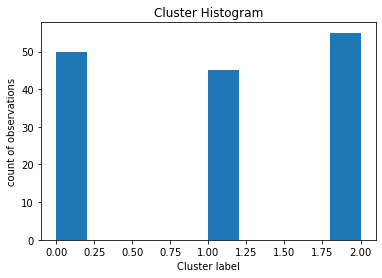

In [21]:
# Histogram
ax = plt
ax.hist(df['Cluster'])
ax.xlabel('Cluster label')
ax.ylabel('count of observations')
ax.title('Cluster Histogram')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# FIRST PART
# CODE WILL NOT RUN. THIS IS JUST FOR REFERENCE

def main():
    # Reading csv file in to a dataframe
    df = pd.read_csv("Stores.csv")
    print(df.head())
    print(df.isnull().sum()) 
    # No null values, no need for data wrangling for null values

    # extracting descriptive features
    df_desc  = df.iloc[:,1:]
    print(df_desc)

    #Normalization
    norm = Normalizer()
    df_ft = pd.DataFrame(norm.fit_transform(df_desc), columns=df_desc.columns)
    print(df_ft)
    
    # Plotting inertia vs k
    ks = range(1, 10)
    inertias = []

    for k in ks:
        model_kmeans = KMeans(n_clusters=k, random_state=2021)
        model_kmeans.fit(df_ft)
        inertias.append(model_kmeans.inertia_)

    plt.plot(ks, inertias, marker='o')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('inertia with respect to k')

    # Histogram
    ax = plt
    ax.hist(df['Cluster'])
    ax.xlabel('Cluster label')
    ax.ylabel('count of observations')
    ax.title('Cluster Histogram')

if __name__ == '__main__':
    main()
